In [1]:
# import packacges 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read normalized csv file 
# don't need to separate out binary variables. we just won't try to change the skew
dfx = pd.read_csv('../csv_files/p1minmax.csv', index_col=0)
dfx.head()

,C1,C4,C5p,C6p,C7,T3p,T4p,T5p,S1p,S2p,S3p,C2,C3p
0,0.458312,0.630418,0.471242,0.622222,0.077442,0.617569,0.534307,0.567375,0.462525,0.532463,0.478776,1.0,0
1,1.000000,0.384735,1.000000,0.000000,0.039063,0.521720,0.545709,0.489104,0.271483,0.667685,0.474754,0.0,1
2,0.327366,0.582011,0.406077,0.000000,0.011032,0.622040,0.524798,0.773408,1.000000,0.324790,0.514761,1.0,1
3,0.814322,0.578004,0.396940,0.000000,0.012766,0.694834,0.268780,0.769738,1.000000,0.386674,0.660248,1.0,1
4,0.286445,0.259982,0.453073,0.280000,0.954944,0.424900,0.394649,0.411101,0.420367,0.592646,0.504014,1.0,0


In [3]:
# examine skew for each column
# keep in mind that we do not need to fix the skew for C2 or C3p because they are binary 
dfx.skew()

C1     0.826473
C4    -0.308635
C5p    0.719622
C6p    1.180845
C7     1.176757
T3p   -0.570120
T4p   -0.069250
T5p    0.048673
S1p    0.540164
S2p    0.624843
S3p    0.418898
C2    -2.123926
C3p    0.147347
dtype: float64

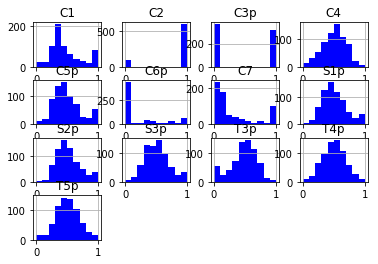

In [4]:
# examine distribution of variables before fixing skew
for col in dfx.columns:
    dfx.hist(color='blue')
    break
plt.show()

**Fixing Skewness of Columns**

In [5]:
dfx['C6p'] = np.sqrt(dfx['C6p'])
dfx['C6p'].skew()

0.7699143643344326

In [6]:
dfx['C7'] = np.sqrt(dfx['C7'])
dfx['C7'].skew()

0.5755368550177864

In [7]:
# rexamine skew of columns 
# skew should be between 0.5 and -0.5 but close enough to these values is also fine 
dfx.skew()

C1     0.826473
C4    -0.308635
C5p    0.719622
C6p    0.769914
C7     0.575537
T3p   -0.570120
T4p   -0.069250
T5p    0.048673
S1p    0.540164
S2p    0.624843
S3p    0.418898
C2    -2.123926
C3p    0.147347
dtype: float64

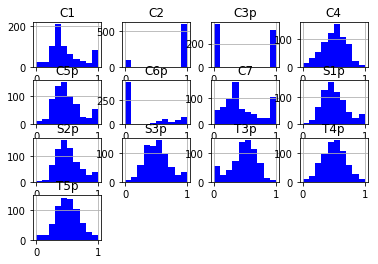

In [8]:
# examine distribution of columns after fixing skewness
# histograms should have an even distribution (or as close to it as possible)
for col in dfx.columns:
    dfx.hist(color='blue')
    break
plt.show()

In [9]:
# print out dfx 
dfx.head()

,C1,C4,C5p,C6p,C7,T3p,T4p,T5p,S1p,S2p,S3p,C2,C3p
0,0.458312,0.630418,0.471242,0.788811,0.278285,0.617569,0.534307,0.567375,0.462525,0.532463,0.478776,1.0,0
1,1.000000,0.384735,1.000000,0.000000,0.197644,0.521720,0.545709,0.489104,0.271483,0.667685,0.474754,0.0,1
2,0.327366,0.582011,0.406077,0.000000,0.105035,0.622040,0.524798,0.773408,1.000000,0.324790,0.514761,1.0,1
3,0.814322,0.578004,0.396940,0.000000,0.112988,0.694834,0.268780,0.769738,1.000000,0.386674,0.660248,1.0,1
4,0.286445,0.259982,0.453073,0.529150,0.977212,0.424900,0.394649,0.411101,0.420367,0.592646,0.504014,1.0,0


In [10]:
# read in dfy csv file
dfy = pd.read_csv('../csv_files/y.csv', index_col=0)
dfy.head()

,pIPO,pH,pL,p1day,Pmid,Y1,Y2
0,10.0,9.5,8.5,11.870000,9.0,0,1
1,8.0,10.0,8.0,7.250000,9.0,1,0
2,7.0,14.0,12.0,6.700000,13.0,1,0
3,11.5,16.0,14.0,12.390000,15.0,1,1
4,21.0,21.0,19.0,56.599998,20.0,0,1


In [11]:
# read in dfid csv file
dfid = pd.read_csv('../csv_files/id.csv', index_col=0)
dfid.head()                   

,I1,I2,I3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834
2,ACAD,ACADIA PHARMACEUTICALS INC,2834
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492


In [12]:
# concat dfid with dfy
df = pd.concat([dfid, dfy], axis=1)
df.head()

,I1,I2,I3,pIPO,pH,pL,p1day,Pmid,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,9.0,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,9.0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,13.0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,15.0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,20.0,0,1


In [13]:
# concat dfx with df to get the full dataframe 
df = pd.concat([df, dfx], axis=1)
df.head()

,I1,I2,I3,pIPO,pH,pL,p1day,Pmid,Y1,Y2,...,C6p,C7,T3p,T4p,T5p,S1p,S2p,S3p,C2,C3p
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,9.0,0,1,...,0.788811,0.278285,0.617569,0.534307,0.567375,0.462525,0.532463,0.478776,1.0,0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,9.0,1,0,...,0.000000,0.197644,0.521720,0.545709,0.489104,0.271483,0.667685,0.474754,0.0,1
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,13.0,1,0,...,0.000000,0.105035,0.622040,0.524798,0.773408,1.000000,0.324790,0.514761,1.0,1
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,15.0,1,1,...,0.000000,0.112988,0.694834,0.268780,0.769738,1.000000,0.386674,0.660248,1.0,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,20.0,0,1,...,0.529150,0.977212,0.424900,0.394649,0.411101,0.420367,0.592646,0.504014,1.0,0


In [14]:
# export the full dataframe
df.to_csv('../csv_files/p1final.csv')

In [15]:
# export just the x variables 
dfx.to_csv('../csv_files/p1no_skewx.csv')